<a href="https://colab.research.google.com/github/deep1003/deep1003/blob/master/PatentBERT01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: 데이터 로딩 및 정제

# Google Drive를 마운트하여 파일 접근
# Google Colab 환경에서 로컬 파일 시스템에 접근할 수 없기 때문에
# Google Drive에 저장된 데이터를 사용하려면 먼저 Google Drive를 마운트해야 함.
# Google Drive를 마운트하면 Colab 환경에서 '/content/drive' 디렉토리 아래로 Drive 파일에 접근 가능함.

from google.colab import drive
import pandas as pd

# Google Drive 마운트
# '/content/drive' 디렉토리에 Google Drive 파일 시스템을 연결
# 이후 Google Drive 내 파일을 Colab에서 직접 읽거나 쓸 수 있음.
drive.mount('/content/drive')

# 이후 데이터 파일을 로드할 때, Google Drive 내의 파일 경로를 지정하여 pandas로 데이터를 불러올 수 있음.


Mounted at /content/drive


In [2]:
#check the lists of files in the mounted drive
!ls /content/drive/MyDrive/data

AI		       DL_abstract		   patentAbstractsW2V_300_10_5.model
AI_abstract_2022_2023  DL_title_2022_2023	   patents.csv
ai_all		       Economic_Networks_PS.ipynb  patents_processed_bigrams.csv
AI_title	       g_patent_abstract.tsv	   patents_processed_tokens.csv
ALL		       mobility			   TSNE.png
DL		       pat


In [3]:
# Google Drive의 CSV 파일 경로
# '/content/drive'는 Google Drive의 루트 디렉토리이며, 여기에 사용자 드라이브의 경로를 연결하여 접근할 수 있음.
# 예시로 'MyDrive' 아래 'data' 폴더에 있는 'patents.csv' 파일을 불러옴.
# 사용자가 원하는 경로에 맞게 파일 경로를 수정해야 함.
file_path = '/content/drive/MyDrive/data/patents.csv'

# CSV 파일 불러오기
# pd.read_csv()를 사용하여 CSV 파일을 데이터프레임으로 로드
# 만약 CSV 파일이 세미콜론(;)으로 구분되어 있다면 sep=';' 옵션을 사용함
df = pd.read_csv(file_path, sep=';')

# 데이터가 성공적으로 로드되었는지 확인
# 데이터의 첫 5행을 출력하여 제대로 불러와졌는지 확인
print("데이터 로딩 성공!")
print(df.head())


데이터 로딩 성공!
    appln_id  earliest_filing_year person_ctry_code cpc_class_symbol  \
0  380934210                  2012               US      G06F  30/30   
1  380934210                  2012               DE      G06F  30/30   
2  380934210                  2012               US      G06F2119/12   
3  380934210                  2012               DE      G06F2119/12   
4  404968208                  2012               US     G06F   8/443   

   nace2_code                                        appln_title  \
0        26.2                Soft-bounded hierarchical synthesis   
1        26.2                Soft-bounded hierarchical synthesis   
2        26.2                Soft-bounded hierarchical synthesis   
3        26.2                Soft-bounded hierarchical synthesis   
4        26.2  Optimized memory configuration deployed on exe...   

                                      appln_abstract  
0  A large block synthesis (LBS) process pre-opti...  
1  A large block synthesis (LBS) proc

In [4]:
# 열 이름 변경
# 'appln_abstract' 열의 이름을 'abstract'로 변경
# rename() 함수를 사용하여 열 이름을 새 이름으로 업데이트함
df = df.rename(columns={'appln_abstract': 'abstract'})


In [5]:
# 기본 텍스트 정제 함수 정의
# 정제 과정: 비알파벳 문자 제거 및 소문자로 변환
# re.sub()를 사용하여 알파벳 이외의 문자를 모두 제거하고, text.lower()로 소문자 변환
import re

def clean_text(text):
    # 비알파벳 문자 제거 및 소문자로 변환
    # 예: 숫자, 특수 문자 등 불필요한 기호를 모두 제거하여 텍스트를 간소화
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # 정규 표현식을 통해 알파벳과 공백만 남김
    text = text.lower().strip()  # 소문자로 변환하고 앞뒤 공백 제거
    return text

# 'abstract' 열에 텍스트 정제 적용
# apply() 함수를 사용하여 데이터프레임의 각 행에 정제 함수 적용
df['abstract_clean'] = df['abstract'].apply(clean_text)

# 정제된 데이터 확인
# 원래 'abstract'와 정제된 'abstract_clean' 열을 함께 출력하여 비교
print("정제된 초록:")
print(df[['abstract', 'abstract_clean']].head())


정제된 초록:
                                            abstract  \
0  A large block synthesis (LBS) process pre-opti...   
1  A large block synthesis (LBS) process pre-opti...   
2  A large block synthesis (LBS) process pre-opti...   
3  A large block synthesis (LBS) process pre-opti...   
4  A configurable memory allocation and managemen...   

                                      abstract_clean  
0  a large block synthesis lbs process preoptimiz...  
1  a large block synthesis lbs process preoptimiz...  
2  a large block synthesis lbs process preoptimiz...  
3  a large block synthesis lbs process preoptimiz...  
4  a configurable memory allocation and managemen...  


In [8]:
df

,appln_id,earliest_filing_year,person_ctry_code,cpc_class_symbol,nace2_code,appln_title,abstract,abstract_clean,embeddings
0,380934210,2012,US,G06F 30/30,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,"[-0.9651594, 0.98270226, -0.80489767, -0.61258..."
1,380934210,2012,DE,G06F 30/30,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,"[-0.9651594, 0.98270226, -0.80489767, -0.61258..."
2,380934210,2012,US,G06F2119/12,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,"[-0.9651594, 0.98270226, -0.80489767, -0.61258..."
3,380934210,2012,DE,G06F2119/12,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,"[-0.9651594, 0.98270226, -0.80489767, -0.61258..."
4,404968208,2012,US,G06F 8/443,26.2,Optimized memory configuration deployed on exe...,A configurable memory allocation and managemen...,a configurable memory allocation and managemen...,"[-0.93553334, 0.9416476, -0.6966797, -0.194925..."
...,...,...,...,...,...,...,...,...,...
95788,588146995,2012,US,G06F 16/683,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,"[-0.9694809, 0.9387223, -0.9988013, -0.5302710..."
95789,588146995,2012,US,G06F 16/951,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,"[-0.9694809, 0.9387223, -0.9988013, -0.5302710..."
95790,588146995,2012,US,G06F 40/205,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,"[-0.9694809, 0.9387223, -0.9988013, -0.5302710..."
95791,588146995,2012,US,G06F 40/242,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,"[-0.9694809, 0.9387223, -0.9988013, -0.5302710..."


In [60]:
import torch

# GPU 사용 가능 여부 확인
# GPU가 활성화되어 있으면 True를 반환하며, 그렇지 않으면 False를 반환
print(f"Is GPU available? {torch.cuda.is_available()}")

# 활성화된 GPU의 장치 이름을 출력
# GPU가 사용 가능한 경우 해당 GPU의 이름을 출력
if torch.cuda.is_available():
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU가 사용 불가능합니다.")


Is GPU available? True
GPU device name: Tesla T4


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

# Google Colab에서 GPU 사용 가능 여부 확인
# GPU가 사용 가능한 경우 'cuda'로 설정하고, 그렇지 않으면 'cpu'로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# PatentBERT 모델 및 토크나이저 불러오기 (GPU로 모델 이동)
# 특허 텍스트에 특화된 BERT 모델을 불러와 토크나이저와 모델을 준비함
# 모델을 GPU로 이동시켜 계산 성능 향상
tokenizer = BertTokenizer.from_pretrained("anferico/bert-for-patents")
model = BertModel.from_pretrained("anferico/bert-for-patents").to(device)

# 배치 기반 벡터 임베딩 추출 함수 정의 (GPU 사용)
# 여러 텍스트를 한 번에 처리하여 계산 속도를 높이기 위한 배치 처리 함수
def extract_embeddings_batch(text_list, batch_size=16):
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        # 배치 단위로 텍스트를 가져옴
        batch_texts = text_list[i:i + batch_size]

        # 배치를 BERT가 처리할 수 있는 형식으로 토크나이징
        # 각 텍스트를 BERT 입력 포맷에 맞게 변환 (패딩, 자르기 포함)
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=128)

        # GPU로 데이터 이동 (토크나이징된 입력 데이터를 GPU로 전송)
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # PatentBERT를 사용하여 임베딩 추출
        # torch.no_grad()는 추론 단계에서 메모리 사용을 최적화함 (기울기 계산 비활성화)
        with torch.no_grad():
            outputs = model(**inputs)

        # [CLS] 토큰의 벡터 임베딩을 추출하여 리스트에 저장
        # 모델의 출력에서 [CLS] 토큰의 벡터를 CPU로 이동 후 numpy 배열로 변환
        cls_embeddings = outputs.pooler_output.cpu().numpy()
        embeddings.append(cls_embeddings)

    # 각 배치에서 추출한 임베딩을 세로로 쌓아서 하나의 큰 배열로 반환
    return np.vstack(embeddings)

# 모든 초록에 대해 벡터 임베딩을 배치로 추출
# 'abstract_clean' 열의 텍스트를 리스트로 변환 후 배치 단위로 임베딩 추출
texts = df['abstract_clean'].tolist()
df['embeddings'] = extract_embeddings_batch(texts, batch_size=16)

# 추출된 임베딩 확인
print("임베딩 추출 완료:")
print(df['embeddings'].head())


In [6]:
# # Step 2: 벡터 임베딩 특징 추출

# # 임베딩 벡터는 텍스트 데이터를 수치화하여 학습 가능한 특징으로 변환하는 과정
# # 이 코드에서는 BERT 모델을 사용해 'abstract_clean' 컬럼에서 텍스트를 벡터화함

# import torch
# from transformers import BertTokenizer, BertModel

# # PatentBERT 모델 및 토크나이저 불러오기
# # 'anferico/bert-for-patents' 모델은 특허 텍스트에 특화된 BERT 모델임
# # 이 모델을 사용해 텍스트를 임베딩 벡터로 변환
# tokenizer = BertTokenizer.from_pretrained("anferico/bert-for-patents")
# model = BertModel.from_pretrained("anferico/bert-for-patents")

# # 벡터 임베딩 추출 함수 정의
# # 입력 텍스트를 BERT 토크나이저로 토큰화하고 BERT 모델을 사용해 임베딩 추출
# def extract_embeddings(text):
#     # 입력 텍스트를 BERT가 처리할 수 있는 형식으로 토크나이징
#     # 'truncation=True'로 텍스트가 max_length(128)를 초과하면 잘라냄
#     # 'padding=True'로 짧은 텍스트는 패딩으로 채움
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

#     # PatentBERT를 사용하여 임베딩 추출
#     # 추론 중이므로 기울기 계산을 하지 않음 (torch.no_grad())
#     with torch.no_grad():
#         outputs = model(**inputs)

#     # [CLS] 토큰의 벡터 임베딩을 반환
#     # BERT 모델의 첫 번째 토큰([CLS])의 임베딩 벡터를 사용함
#     cls_embedding = outputs.pooler_output.squeeze().numpy()
#     return cls_embedding

# # 모든 초록에 대해 벡터 임베딩 추출
# # 'abstract_clean' 열의 각 텍스트에 대해 임베딩 벡터를 추출하여 새로운 'embeddings' 열에 저장
# df['embeddings'] = df['abstract_clean'].apply(extract_embeddings)

# # 추출된 임베딩 확인
# # 각 초록에 대해 계산된 임베딩 벡터의 일부를 확인
# print("임베딩 추출 완료:")
# print(df['embeddings'].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/329k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

임베딩 추출 완료:
0    [-0.9651594, 0.98270226, -0.80489767, -0.61258...
1    [-0.9651594, 0.98270226, -0.80489767, -0.61258...
2    [-0.9651594, 0.98270226, -0.80489767, -0.61258...
3    [-0.9651594, 0.98270226, -0.80489767, -0.61258...
4    [-0.93553334, 0.9416476, -0.6966797, -0.194925...
Name: embeddings, dtype: object


In [9]:
# # 데이터프레임을 CSV 파일로 저장
# # 임베딩이 포함된 데이터프레임을 Google Drive에 CSV 파일로 저장
# # 'index=False'는 데이터프레임의 인덱스가 저장되지 않도록 설정

# df.to_csv('/content/drive/MyDrive/data/patents_embeddings.csv', index=False)


In [10]:
# 저장된 CSV 파일을 다시 데이터프레임으로 불러오기
# 'patents_embeddings.csv' 파일을 읽어 df1 데이터프레임에 저장
df1 = pd.read_csv('/content/drive/MyDrive/data/patents_embeddings.csv')


In [11]:
df1

,appln_id,earliest_filing_year,person_ctry_code,cpc_class_symbol,nace2_code,appln_title,abstract,abstract_clean,embeddings
0,380934210,2012,US,G06F 30/30,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,[-0.9651594 0.98270226 -0.80489767 ... 0.21...
1,380934210,2012,DE,G06F 30/30,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,[-0.9651594 0.98270226 -0.80489767 ... 0.21...
2,380934210,2012,US,G06F2119/12,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,[-0.9651594 0.98270226 -0.80489767 ... 0.21...
3,380934210,2012,DE,G06F2119/12,26.2,Soft-bounded hierarchical synthesis,A large block synthesis (LBS) process pre-opti...,a large block synthesis lbs process preoptimiz...,[-0.9651594 0.98270226 -0.80489767 ... 0.21...
4,404968208,2012,US,G06F 8/443,26.2,Optimized memory configuration deployed on exe...,A configurable memory allocation and managemen...,a configurable memory allocation and managemen...,[-0.93553334 0.9416476 -0.6966797 ... -0.55...
...,...,...,...,...,...,...,...,...,...
95788,588146995,2012,US,G06F 16/683,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,[-0.9694809 0.9387223 -0.9988013 ... -0.96...
95789,588146995,2012,US,G06F 16/951,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,[-0.9694809 0.9387223 -0.9988013 ... -0.96...
95790,588146995,2012,US,G06F 40/205,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,[-0.9694809 0.9387223 -0.9988013 ... -0.96...
95791,588146995,2012,US,G06F 40/242,26.2,System and method for context driven voice int...,A sequence of context based search verb and se...,a sequence of context based search verb and se...,[-0.9694809 0.9387223 -0.9988013 ... -0.96...


In [18]:
# Step 3: 분류, 검증 및 시각화

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim

# 분류를 위한 데이터 준비
# 'embeddings' 열에 저장된 임베딩 벡터를 numpy 배열로 변환
# np.vstack()는 리스트 형태의 임베딩을 배열로 변환하여 분류 모델에서 사용할 수 있도록 준비함
X = np.vstack(df1['embeddings'].values)

# 레이블 데이터 준비 (예: 'cpc_class_symbol' 열)
# 'cpc_class_symbol'은 각 샘플의 타겟 클래스 레이블을 의미하며, 이를 정수로 인코딩하여 모델 학습에 사용함
y = df1['cpc_class_symbol']

# 레이블을 정수로 인코딩
# LabelEncoder를 사용하여 클래스 레이블을 정수로 변환 (예: ['A', 'B', 'C'] -> [0, 1, 2])
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [19]:
X

array([['[-0.9651594   0.98270226 -0.80489767 ...  0.21271816 -0.9887927\n -0.9623025 ]'],
       ['[-0.9651594   0.98270226 -0.80489767 ...  0.21271816 -0.9887927\n -0.9623025 ]'],
       ['[-0.9651594   0.98270226 -0.80489767 ...  0.21271816 -0.9887927\n -0.9623025 ]'],
       ...,
       ['[-0.9694809   0.9387223  -0.9988013  ... -0.96990293 -0.98870176\n -0.96011287]'],
       ['[-0.9694809   0.9387223  -0.9988013  ... -0.96990293 -0.98870176\n -0.96011287]'],
       ['[-0.9694809   0.9387223  -0.9988013  ... -0.96990293 -0.98870176\n -0.96011287]']],
      dtype='<U96')

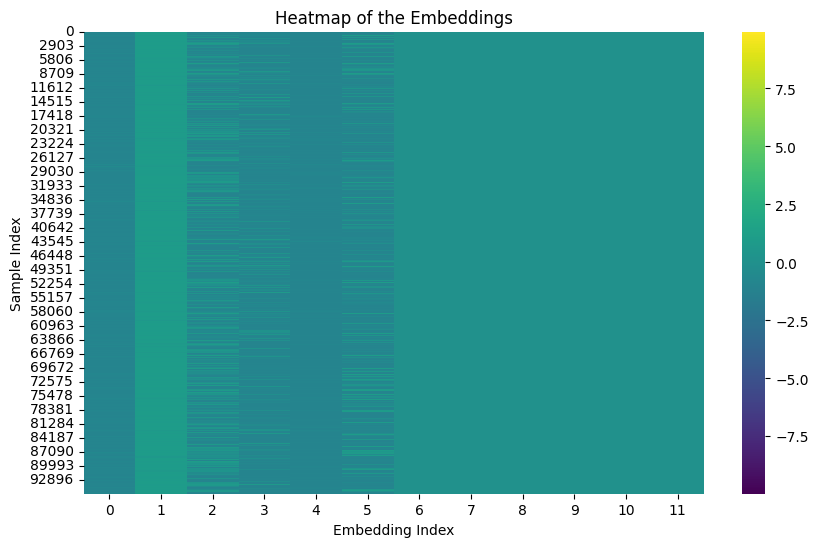

In [24]:
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Function to clean string and remove '...'
# 문자열에 포함된 '...' 제거 및 숫자 이외의 모든 문자를 삭제하여 숫자 리스트로 변환
def clean_string_to_float_list(embedding_str):
    # Ellipses(...) 제거
    cleaned_str = re.sub(r'\.\.\.', '', embedding_str)

    # 숫자 및 기호(-, .)를 제외한 모든 문자를 공백으로 대체하여 삭제
    cleaned_str = re.sub(r'[^\d.-]+', ' ', cleaned_str)

    # 숫자 문자열을 분리하고 float 타입으로 변환하여 리스트 반환
    return list(map(float, cleaned_str.split()))

# Apply the cleaning function to each element in X
# 각 문자열 임베딩에 대해 클린 함수를 적용하여 숫자 리스트로 변환
embeddings = [clean_string_to_float_list(x[0]) for x in X]

# Determine the length of the longest list
# 모든 리스트 중 가장 긴 리스트의 길이를 계산하여 패딩에 사용
max_length = max(len(embedding) for embedding in embeddings)

# Pad the shorter lists with zeros to make all lists the same length
# 모든 리스트의 길이가 max_length와 같도록 짧은 리스트는 0으로 패딩
padded_embeddings = np.array([embedding + [0] * (max_length - len(embedding)) for embedding in embeddings])

# Create a heatmap
# 임베딩 데이터를 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(padded_embeddings, cmap='viridis')
plt.title("Heatmap of the Embeddings")
plt.xlabel('Embedding Index')  # 임베딩 벡터의 각 차원을 나타내는 x축 레이블
plt.ylabel('Sample Index')  # 각 샘플(문서)의 인덱스를 나타내는 y축 레이블
plt.show()


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

# 주어진 데이터와 타깃 레이블을 훈련 세트와 검증 세트로 분할
# X: 특징(features) 데이터, 각 샘플의 속성을 나타내는 데이터
# y_encoded: 타깃 레이블 데이터, 각 샘플에 대한 정답 값
# test_size=0.2: 검증 데이터가 전체 데이터의 20%를 차지하도록 설정
# random_state=42: 데이터를 분할하는 방식을 고정하기 위한 시드 값

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 결과:
# X_train: 훈련 데이터의 특징들 (전체 데이터의 80%)
# X_val: 검증 데이터의 특징들 (전체 데이터의 20%)
# y_train: 훈련 데이터의 타깃 레이블들
# y_val: 검증 데이터의 타깃 레이블들

# X_train과 y_train을 사용하여 모델을 학습하고,
# X_val과 y_val을 사용하여 학습된 모델의 성능을 평가합니다.


In [26]:
X_train

array([['[-0.98076844  0.9541773   0.26247653 ... -0.8324406  -0.97660357\n -0.4961725 ]'],
       ['[-0.94077504  0.9529808   0.706807   ... -0.87536824 -0.9914174\n -0.6954285 ]'],
       ['[-0.55934346  0.8865322  -0.9773031  ... -0.99453026 -0.7012828\n -0.9944114 ]'],
       ...,
       ['[-0.9818702   0.9666062  -0.78093725 ... -0.69322413 -0.982925\n -0.9868169 ]'],
       ['[-0.96120113  0.9784975  -0.95349276 ... -0.95795166 -0.9908543\n -0.9954156 ]'],
       ['[-0.97438776  0.97165394  0.10002403 ... -0.91306746 -0.98685735\n  0.00609977]']],
      dtype='<U96')

In [27]:
y_train

array([12703,  8772,  1335, ...,  3187, 12782, 12907])

In [28]:
X_val

array([['[-0.9083087   0.91302043  0.9764221  ... -0.82851875 -0.94702023\n  0.9963598 ]'],
       ['[-0.8679952   0.68684167 -0.2912093  ... -0.95801145 -0.9504901\n  0.31316835]'],
       ['[-0.98581445  0.96874493  0.5778828  ... -0.973227   -0.99564624\n -0.83369607]'],
       ...,
       ['[-0.9171115   0.897436   -0.83519864 ...  0.576097   -0.9856911\n -0.974413  ]'],
       ['[-0.9690966   0.9431754  -0.93860245 ... -0.96499324 -0.9946324\n -0.87915254]'],
       ['[-0.9856692   0.9661498  -0.9868287  ... -0.95855415 -0.9961523\n -0.970903  ]']],
      dtype='<U96')

In [29]:
y_val

array([ 5767,  8868,  4244, ...,  5403, 12946,  7636])

In [41]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import re

# Step 1: 임베딩 문자열을 클린한 후 numpy 배열로 변환하고 리스트의 길이를 통일
# 임베딩을 numpy 배열로 변환하고 리스트의 길이를 통일

def clean_embedding_string(embedding_str):
    # 문자열에 있는 줄 바꿈 문자를 공백으로 바꾸고, '...' 제거
    cleaned_str = embedding_str.replace("\n", " ").replace("...", " ")

    # 숫자와 점, 부호를 제외한 모든 문자를 제거
    cleaned_str = re.sub(r'[^\d.-]+', ' ', cleaned_str)

    # 숫자 문자열을 리스트 형태로 변환 후 반환
    return list(map(float, cleaned_str.split()))

# 각 샘플의 임베딩을 클린한 리스트로 변환
df1['embeddings_cleaned'] = df1['embeddings'].apply(clean_embedding_string)

# Step 2: 리스트 길이를 통일하기 위한 패딩
# 모든 리스트의 길이를 맞추기 위해 가장 긴 리스트의 길이 계산
max_length = max(df1['embeddings_cleaned'].apply(len))

# 최대 길이에 맞춰 짧은 리스트는 0으로 패딩
df1['embeddings_padded'] = df1['embeddings_cleaned'].apply(lambda x: x + [0] * (max_length - len(x)))

# 패딩된 리스트를 numpy 배열로 변환 (모델 학습에 사용될 데이터)
X = np.vstack(df1['embeddings_padded'].values)

# Step 3: 타깃 레이블 가져오기
# 'cpc_class_symbol' 열을 타깃 레이블로 설정
y = df1['cpc_class_symbol']


In [43]:
X

array([[-0.9651594 ,  0.98270226, -0.80489767, ...,  0.        ,
         0.        ,  0.        ],
       [-0.9651594 ,  0.98270226, -0.80489767, ...,  0.        ,
         0.        ,  0.        ],
       [-0.9651594 ,  0.98270226, -0.80489767, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.9694809 ,  0.9387223 , -0.9988013 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.9694809 ,  0.9387223 , -0.9988013 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.9694809 ,  0.9387223 , -0.9988013 , ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
y

,cpc_class_symbol
0,G06F 30/30
1,G06F 30/30
2,G06F2119/12
3,G06F2119/12
4,G06F 8/443
...,...
95788,G06F 16/683
95789,G06F 16/951
95790,G06F 40/205
95791,G06F 40/242


In [45]:
# 레이블을 정수로 인코딩
# LabelEncoder를 사용해 클래스 레이블을 정수로 변환하여 모델이 이해할 수 있는 형식으로 변환
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터셋을 학습 세트와 검증 세트로 분할
# 훈련 세트와 검증 세트를 8:2 비율로 나눔
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 간단한 신경망 모델 정의 (분류용)
# 두 개의 선형 레이어와 ReLU 활성화 함수를 사용하는 신경망 정의
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # 첫 번째 레이어: 입력 크기에서 128개의 노드로 변환
        self.relu = nn.ReLU()  # 활성화 함수: 비선형성을 추가하기 위해 ReLU 사용
        self.fc2 = nn.Linear(128, num_classes)  # 두 번째 레이어: 128개 노드에서 클래스 수로 출력

    def forward(self, x):
        x = self.fc1(x)  # 첫 번째 레이어 통과
        x = self.relu(x)  # ReLU 활성화 함수 통과
        x = self.fc2(x)  # 두 번째 레이어 통과 (출력)
        return x

# 모델, 손실 함수 및 최적화기 초기화
# 모델에 필요한 입력 크기(input_size)와 출력 클래스 수(num_classes)를 정의하여 모델 초기화
input_size = X_train.shape[1]
num_classes = len(label_encoder.classes_)
model = SimpleNN(input_size, num_classes)

# 손실 함수는 CrossEntropyLoss, 최적화 함수는 Adam을 사용하여 모델 학습 준비
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 데이터를 torch 텐서로 변환
# 모델 학습에 사용될 데이터 (X_train, y_train)를 텐서 형식으로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# 모델 학습 함수
# 에폭 수(epochs) 동안 모델을 학습하고 각 에폭마다 손실(loss)을 출력
def train_model(model, X_train_tensor, y_train_tensor, epochs=10):
    for epoch in range(epochs):
        model.train()  # 모델을 학습 모드로 전환
        optimizer.zero_grad()  # 이전 단계의 기울기 초기화
        outputs = model(X_train_tensor)  # 모델에 입력 데이터 전달
        loss = criterion(outputs, y_train_tensor)  # 손실 계산
        loss.backward()  # 역전파 수행
        optimizer.step()  # 가중치 업데이트
        print(f"에폭 {epoch+1}/{epochs}, 손실: {loss.item()}")  # 에폭별 손실 출력

# 모델 학습 실행
train_model(model, X_train_tensor, y_train_tensor)

# 모델 검증 함수
# 학습된 모델을 검증 데이터에 대해 평가하고 정확도와 분류 보고서를 출력
def evaluate_model(model, X_val_tensor, y_val_tensor):
    model.eval()  # 모델을 평가 모드로 전환
    with torch.no_grad():
        outputs = model(X_val_tensor)  # 검증 데이터로 예측 수행
        _, preds = torch.max(outputs, 1)  # 가장 높은 확률의 클래스를 예측 결과로 추출

        # 예측된 클래스와 실제 클래스의 고유값 확인
        print(f"Unique predicted classes: {len(np.unique(preds.numpy()))}")
        print(f"Unique true classes: {len(np.unique(y_val_tensor.numpy()))}")

        # 정확도 계산
        accuracy = accuracy_score(y_val_tensor.numpy(), preds.numpy())
        print(f"검증 정확도: {accuracy}")

        # 분류 보고서 출력 (classification_report 함수 사용)
        print("분류 보고서:")
        print(classification_report(y_val_tensor.numpy(), preds.numpy(), labels=np.unique(y_val_tensor.numpy()), target_names=label_encoder.classes_))

        return y_val_tensor.numpy(), preds.numpy()

# 모델 검증 실행
y_true, y_pred = evaluate_model(model, X_val_tensor, y_val_tensor)


Streaming output truncated to the last 5000 lines.
    B41F  17/20       0.00      0.00      0.00         2
   B41F  19/007       0.00      0.00      0.00         1
    B41J   2/00       0.00      0.00      0.00         1
  B41J   2/0057       0.00      0.00      0.00         1
    B41J   2/01       0.00      0.00      0.00         1
   B41J   2/045       0.00      0.00      0.00         1
 B41J   2/04535       0.00      0.00      0.00         1
 B41J   2/04536       0.00      0.00      0.00         2
  B41J   2/0456       0.00      0.00      0.00         1
 B41J   2/04581       0.00      0.00      0.00         1
 B41J   2/04588       0.00      0.00      0.00         1
  B41J   2/0459       0.00      0.00      0.00         1
 B41J   2/04591       0.00      0.00      0.00         3
    B41J   2/07       0.00      0.00      0.00         1
  B41J   2/1404       0.00      0.00      0.00         1
 B41J   2/14274       0.00      0.00      0.00         1
   B41J   2/175       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 7670, does not match size of target_names, 14230
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

In [47]:
# # 시각화: 혼동 행렬
# cm = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('예측값')
# plt.ylabel('실제값')
# plt.title('혼동 행렬')
# plt.show()


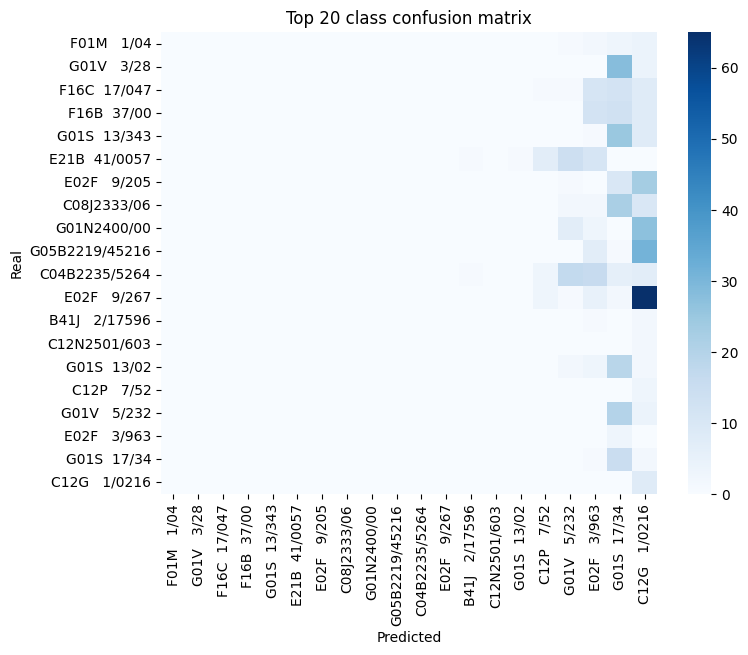

In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 모델이 GPU에서 작동하도록 설정
# torch.device()를 사용해 GPU를 사용 가능한 경우 "cuda"로 설정, 그렇지 않으면 "cpu" 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# GPU 사용하여 예측 수행
# 모델을 평가 모드로 전환하고 검증 데이터를 GPU에서 예측한 후 결과를 CPU로 이동
def predict_on_gpu(model, X_val_tensor):
    model.eval()  # 모델을 평가 모드로 전환
    with torch.no_grad():  # 기울기 계산을 비활성화하여 추론 최적화
        # 입력 데이터를 GPU로 이동
        X_val_tensor = X_val_tensor.to(device)

        # 모델에 데이터를 전달하여 예측 수행
        outputs = model(X_val_tensor)

        # 가장 높은 확률의 클래스를 예측 결과로 반환
        _, preds = torch.max(outputs, 1)

        # 예측 결과를 다시 CPU로 이동하여 넘파이 배열로 반환
        return preds.cpu().numpy()

# 모델을 사용하여 예측 (GPU 사용)
y_pred = predict_on_gpu(model, X_val_tensor)

# 혼동 행렬 계산
# y_true와 y_pred를 기반으로 혼동 행렬을 계산
cm = confusion_matrix(y_true, y_pred)

# 상위 N개의 혼동된 클래스를 선택하여 시각화
N = 20  # 상위 20개의 혼동된 클래스를 선택
# 각 클래스의 혼동 합계 계산 (행과 열의 합 - 대각선 값)
class_sums = np.sum(cm, axis=1) + np.sum(cm, axis=0) - np.diag(cm)

# 가장 혼동이 많이 발생한 상위 N개의 클래스 선택
top_classes = np.argsort(class_sums)[-N:]

# 상위 N개의 클래스에 대한 혼동 행렬 생성
cm_top = cm[np.ix_(top_classes, top_classes)]

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_top, annot=False, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_[top_classes],
            yticklabels=label_encoder.classes_[top_classes])

plt.xlabel('Predicted')  # x축: 예측된 클래스
plt.ylabel('Real')  # y축: 실제 클래스
plt.title(f'Top {N} class confusion matrix')  # 제목 설정
plt.show()


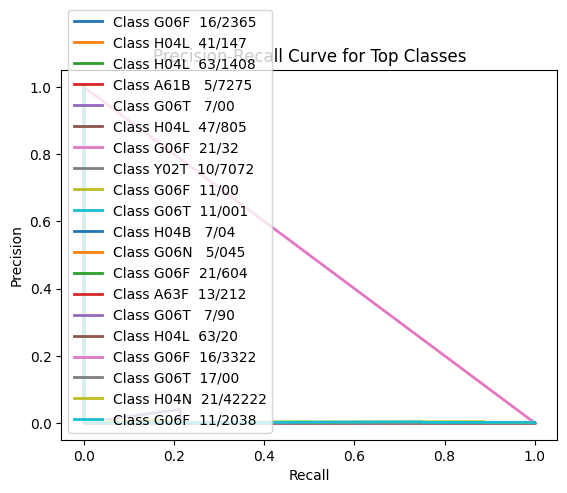

In [58]:
import warnings
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# 경고 메시지 무시
warnings.filterwarnings("ignore")

# 상위 N개의 클래스만 시각화하기 (예: 상위 10개 클래스)
N = 20

# y_true를 바이너리 형태로 변환
y_true_binary = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))

# X_val_tensor를 GPU로 이동
X_val_tensor = X_val_tensor.to(device)

# 모델 예측 결과를 GPU에서 계산하고 CPU로 이동
model.eval()  # 평가 모드로 전환
with torch.no_grad():
    outputs = model(X_val_tensor)  # 모델에 데이터 전달하여 예측 수행
    y_scores = outputs.cpu().detach().numpy()  # 결과를 CPU로 이동하여 numpy로 변환

# 클래스별 점수 합계를 계산하고 상위 N개의 클래스 선택
class_sums = np.sum(y_scores, axis=0)
top_classes = np.argsort(class_sums)[-N:]

# 상위 N개의 클래스에 대해 Precision-Recall Curve 그리기
for i in top_classes:
    precision, recall, _ = precision_recall_curve(y_true_binary[:, i], y_scores[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {label_encoder.classes_[i]}')

# 그래프 설정
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Top Classes')
plt.legend(loc="lower left")
plt.show()
